In [26]:
import csv
import math
import random
import pandas as pd 

In [33]:
def loadCsv(filename):
    lines = pd.read_csv('diabetes.csv')
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [3]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset)*splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [7]:
def seperateByClass(dataset):
    seperated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in seperated):
            seperated[vector[-1]] = []
        seperated[vector[-1]].append(vector)
    return seperated

In [9]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [10]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg , 2)for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [11]:
                def summarize(dataset):
                     summaries = [(mean(attribute),stdev(attribute)) for attribute in zip(*dataset)]
                     del summaries[-1]
                     return summaries

In [12]:
def summarizeByClass(dataset):
    seperated = seperateByClass(dataset)
    summaries = {}
    for classValue, instances in seperated.items():
        summaries[classValue] = summarize(instances)
    return summaries

## Gaussian Distribution formula

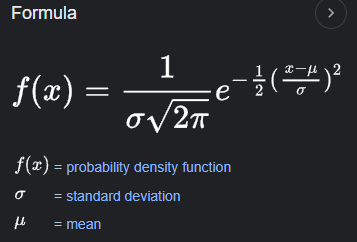

In [13]:
def calculateProbabilities(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [14]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x,mean,stdev)
        return probabilities

In [15]:
def predict(summaries,inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1 
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [16]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [17]:
 def getAccuracy(testSet, predictions):
        correct = 0 
        for x in range(len(testSet)):
            if testSet[x][-1] == predictions[x]:
                correct += 1
        return (correct/float(len(testSet)))*100.0

In [34]:
def main():
    filename = pd.read_csv('diabetes.csv')
    splitRatio = 0.7
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset),len(trainingSet),len(testSet)))
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries,testSet)
    accuracy = getAccuracy(testSet,predictions)
    print('Accuracy: {0}%'.format(accuracy))
    
main()

ValueError: could not convert string to float: 'P'